[11 14]
12-


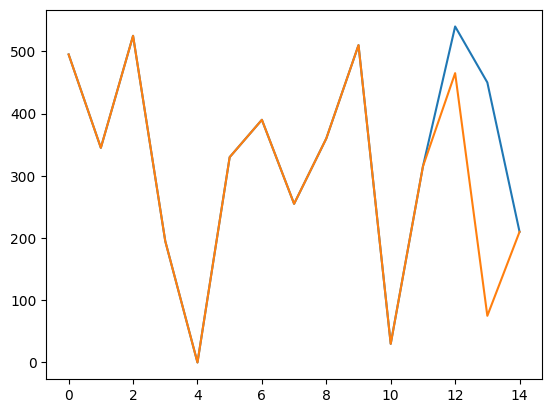

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

SIZE = 15

base = np.arange(0,550,15)

r1 = np.random.choice(base, SIZE, replace=False)
r2 = np.random.choice(base, SIZE, replace=False)

difs = np.random.randint(1,3)
div = np.random.choice(list(range(1,SIZE)), difs*2, replace=False)
for i in range(0,len(div), 2):
    if div[i] == div[i+1]-1:
        if i > 0 and div[i] == div[i-1] + 1:
            div.remove(div[i])
            div.remove(div[i+1])
        else:
            div[i] -= 1
div.sort()

conv = True
change = 0
for i in range(0, len(r1)):
    if conv:
        r2[i] = r1[i]
        r1[i] += r1[i] - r2[i]

    if change < len(div) and i == div[change]:
        conv = not conv
        change += 1

r2[0] = r1[0]
r2[-1] = r1[-1]

print(div)
changed_hops = ""
for i in range(0, len(div), 2):
    changed_hops += f"{div[i] + 1}-"
print(changed_hops)

plt.plot(r1)
plt.plot(r2)

# Generating the file
tests = os.listdir('./test')

old_path = [f'{i}.{i}.{i}.{i}:0:0.00,0.00,0.00,0.00:' for i in r1]
new_path = [f'{i}.{i}.{i}.{i}:0:0.00,0.00,0.00,0.00:' for i in r2]

old_path = "|".join(old_path)
new_path = "|".join(new_path)


with open(f'./test/test{len(tests) + 1}.in', "a") as file:
    file.write(" ".join([old_path, new_path, '1.1.1.11:0:0.00,0.00,0.00,0.00:', changed_hops]))
    

[12]


'plt.xlabel("Hop")\nplt.ylabel("Identifier")\n\nplt.plot(old_hop_id, color="gray", label="Old path")\nplt.plot(new_hop_id, color="black", label="New path")\nplt.plot(out_hop_id, linewidth=8, alpha=0.5, label="Remaped path")'

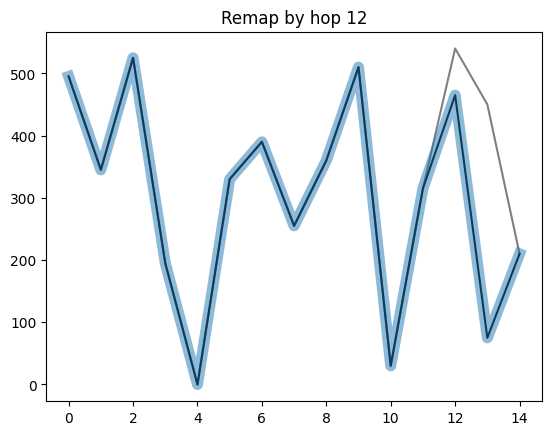

In [26]:
import re
import os
import sys
import subprocess
import matplotlib.pyplot as plt

def clear(path):
    re.sub("[0:|]", "", path)

filePath = './test/test7.in' #sys.argv[1]
file = open(filePath, "r")

input = file.read()
[old_path, new_path, dest, changed_hops] = input.split(" ")
old_hop_id = [int(info.split(".")[0]) for info in old_path.split("|")]
new_hop_id = [int(info.split(".")[0]) for info in new_path.split("|")]

changed_hops = changed_hops.split("-")
changed_hops = [int(c) for c in changed_hops if c != '']

print(changed_hops)

fig, axs = plt.subplots(1,len(changed_hops), squeeze=False)
for i in range(0, len(changed_hops)):
    axs[0,i].plot(old_hop_id, color="gray", label="Old path")
    axs[0,i].plot(new_hop_id, color="black", label="New path")
    axs[0,i].set_title(f"Remap by hop {changed_hops[i]}")

i = 0
for hop in changed_hops:
    # output = subprocess.check_output()
    output_path = new_path
    out_hop_id = [int(info.split(".")[0]) for info in output_path.split("|")]
    axs[0,i].plot(out_hop_id, linewidth=8, alpha=0.5, label="Remaped path")
    i += 1

'''plt.xlabel("Hop")
plt.ylabel("Identifier")

plt.plot(old_hop_id, color="gray", label="Old path")
plt.plot(new_hop_id, color="black", label="New path")
plt.plot(out_hop_id, linewidth=8, alpha=0.5, label="Remaped path")'''
    